In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
path=r"C:\Users\jagar\Documents\Visadataset.csv"
visa_df=pd.read_csv(path)
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
# we have two columns 
# continent an another columns is case_status
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [4]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [5]:
# how many asia students got certified
# how many asia stidents got denied

con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con=con1&con2
len(visa_df[con])

11012

In [6]:
continent_labels=visa_df['continent'].unique()
certified_list=[]
for i in continent_labels:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con=con1&con2
    certified_list.append(len(visa_df[con]))
certified_list

[11012, 397, 2037, 2957, 493, 122]

In [7]:

import pandas as pd
path=r"C:\Users\jagar\Documents\Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [26]:
continent_labels=visa_df['continent'].unique()
certified_list=[]
denied_list=[]
for i in continent_labels:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    certi_con=con1&con2
    deni_con=con1&con3
    certified_list.append(len(visa_df[certi_con]))
    denied_list.append(len(visa_df[deni_con]))
certified_list,denied_list
pd.DataFrame(zip(certified_list,denied_list),
             index=continent_labels,
             columns=['Certified','Denied'])

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


In [9]:
con=visa_df['case_status']=='Certified'
visa_df[con].groupby('continent').size()

continent
Africa             397
Asia             11012
Europe            2957
North America     2037
Oceania            122
South America      493
dtype: int64

In [10]:
col1=visa_df['continent']
col2=visa_df['case_status']
r1=pd.crosstab(col1,col2)

<Axes: xlabel='continent'>

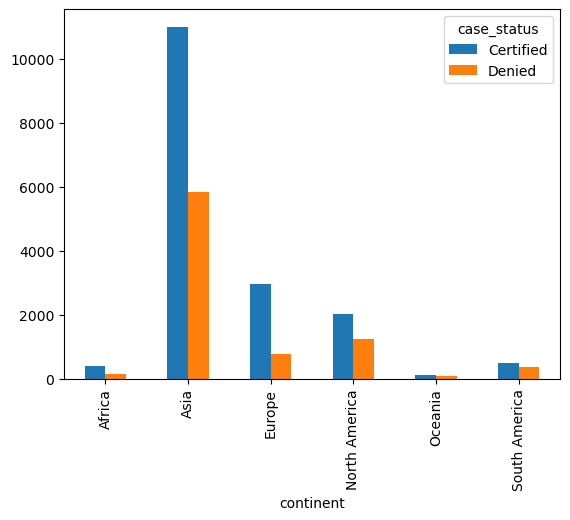

In [11]:
r1.plot(kind='bar')

In [12]:
col2=visa_df['continent']
col1=visa_df['case_status']
r2=pd.crosstab(col2,col1)

<Axes: xlabel='continent'>

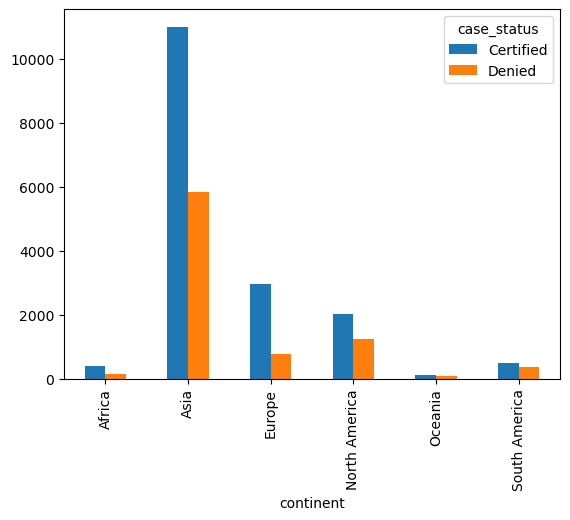

In [13]:
r2.plot(kind='bar')

In [14]:
con=visa_df['case_status']=='Denied'
visa_df[con].groupby('continent').size()

continent
Africa            154
Asia             5849
Europe            775
North America    1255
Oceania            70
South America     359
dtype: int64

In [15]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col2,col3]
pd.crosstab(col1,cols)

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

In [16]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col1,col2]
pd.crosstab(col3,cols)

continent                Africa             Asia           Europe         \
case_status           Certified Denied Certified Denied Certified Denied   
education_of_employee                                                      
Bachelor's                   81     62      4407   2761      1040    259   
Doctorate                    43     11       780    143       788     58   
High School                  23     43       676   1614       162    328   
Master's                    250     38      5149   1331       967    130   

continent             North America          Oceania        South America  \
case_status               Certified Denied Certified Denied     Certified   
education_of_employee                                                       
Bachelor's                      641    584        38     28           160   
Doctorate                       207     51        19      3            75   
High School                     210    191        19     17            74   
Master's                        979    429        46     22           184   

continent                     
case_status           Denied  
education_of_employee         
Bachelor's               173  
Doctorate                 14  
High School               63  
Master's                 109

**Numerical-Numerical**

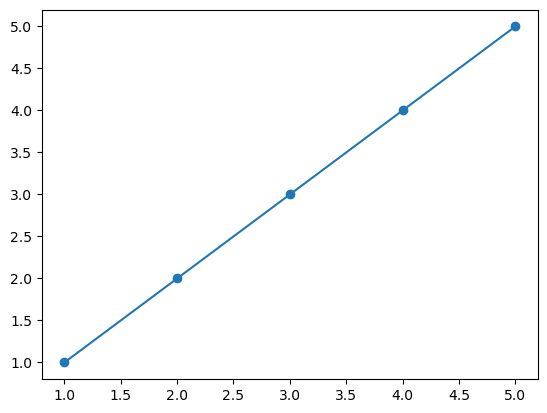

In [32]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)

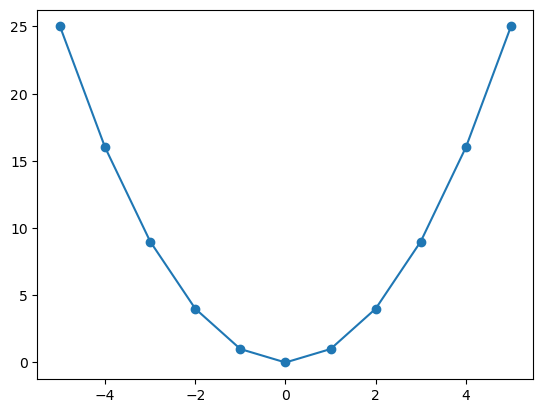

In [18]:
# x=[i for in range(1,10)]
x=list(range(-5,6))
y=[i**2  for i in x]
plt.scatter(x,y)
plt.plot(x,y)

Text(0, 0.5, 'prevailing_wage')

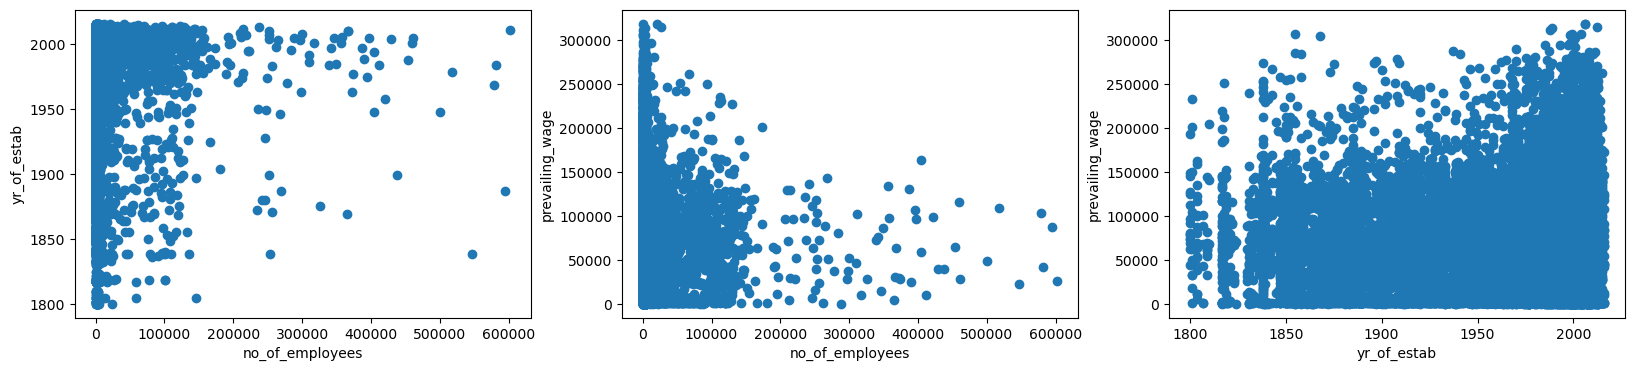

In [19]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(20,4))
plt.subplot(1,3,1).scatter(col1,col2)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
#=======================================
plt.subplot(1,3,2).scatter(col1,col3)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')
#=================================
plt.subplot(1,3,3).scatter(col2,col3)
plt.xlabel('yr_of_estab')
plt.ylabel('prevailing_wage')
 

In [20]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [21]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heat map**

<Axes: >

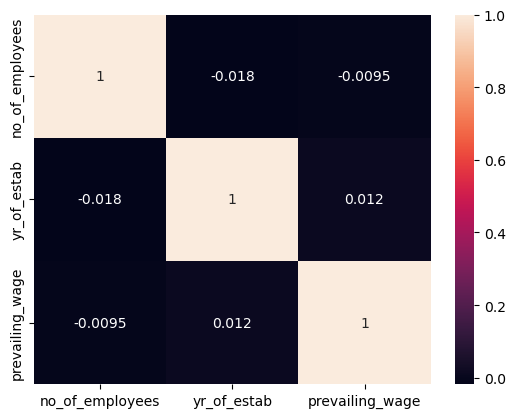

In [22]:
import seaborn as sns
corr=visa_df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

In [23]:
import pandas as pd
path=r"C:\Users\jagar\Downloads\winequality_red.csv"
wine_df=pd.read_csv(path)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: >

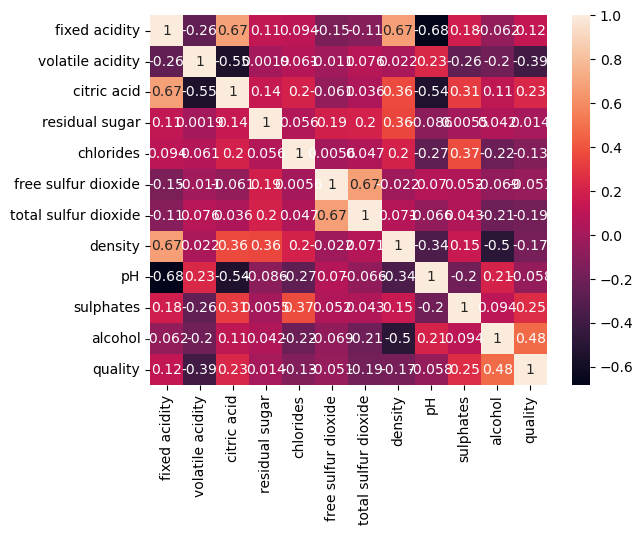

In [24]:
import seaborn as sns
corr=wine_df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

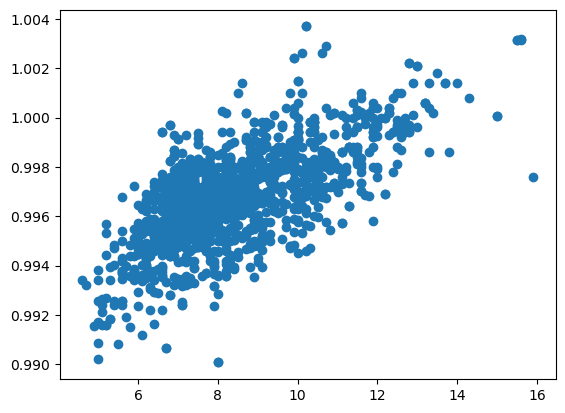

In [25]:
plt.scatter(wine_df['fixed acidity'],wine_df['density'])